In [37]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [38]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] = data.target
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.0176

In [39]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [40]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_)
    
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

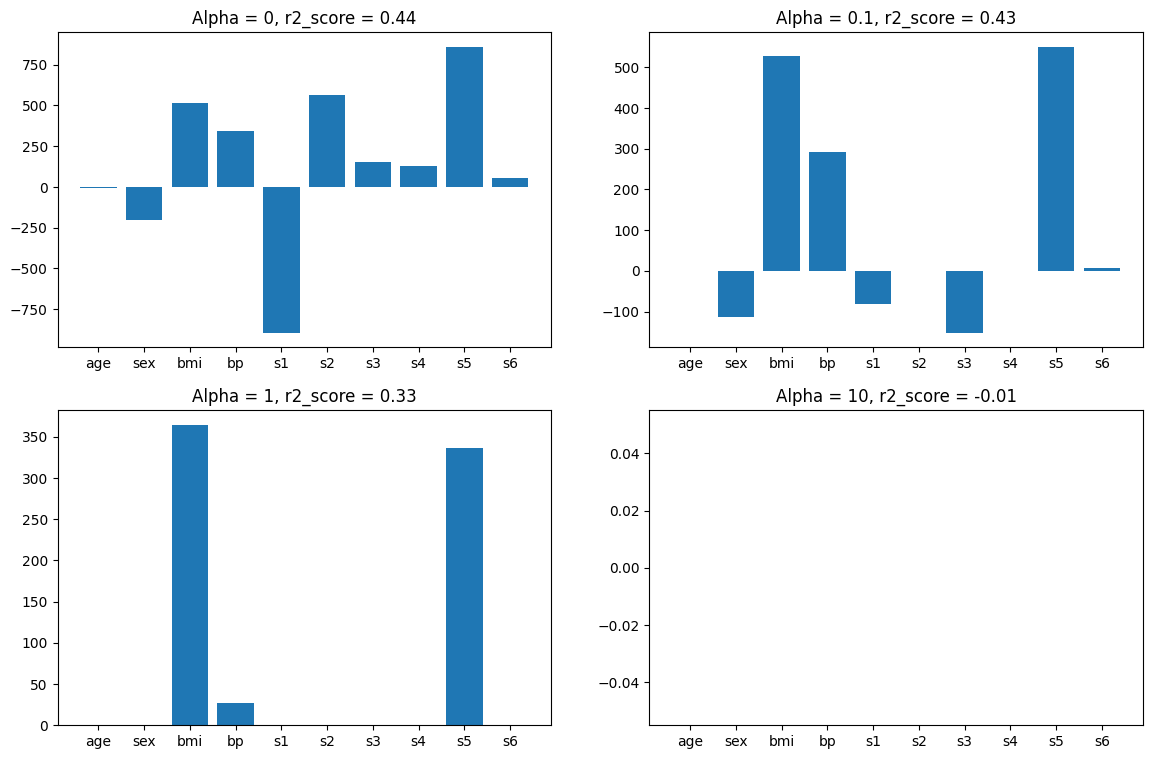

In [41]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title(f'Alpha = 0, r2_score = {round(r2_scores[0],2)}')

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f'Alpha = 0.1, r2_score = {round(r2_scores[1],2)}')

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f'Alpha = 1, r2_score = {round(r2_scores[2],2)}')

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f'Alpha = 10, r2_score = {round(r2_scores[3],2)}')

plt.show()

In [42]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
print(coefs)

[[-9.158653178827302, -205.45432152374477, 516.6937447748397, 340.6199989865696, -895.5519890478307, 561.2206689816666, 153.8931038213109, 126.73139522044322, 861.1269967641427, 52.42112237084306], [-9.069064427710549, -205.32940644029816, 516.7894184761954, 340.5323788506898, -888.6609037716056, 555.9585835273743, 150.59365540156548, 125.45014323337259, 858.6455407465979, 52.38029359911575], [-8.262769762774766, -204.2053642865741, 517.6500728185326, 339.7439007011422, -826.6636032998379, 508.61739504078605, 120.90860745675037, 113.92177295996483, 836.3207533445016, 52.01284899153942], [-1.3597208884510779, -192.93718017691754, 526.3565144633945, 332.6411010998134, -430.22697504784867, 191.29547987495616, -44.034912707594444, 68.98898658152072, 688.3960277772268, 47.940616213183894], [0.0, -113.96992828855377, 526.7443960144338, 292.6284719781299, -82.69368148743654, -0.0, -152.6853383502316, 0.0, 551.0802905457624, 7.17099206717106], [0.0, 0.0, 363.885742163368, 27.273163042284008, 0

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

In [43]:
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [50]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
print(coefs)

[[-9.158653178827302, -205.45432152374477, 516.6937447748397, 340.6199989865696, -895.5519890478307, 561.2206689816666, 153.8931038213109, 126.73139522044322, 861.1269967641427, 52.42112237084306], [-9.069064427710549, -205.32940644029816, 516.7894184761954, 340.5323788506898, -888.6609037716056, 555.9585835273743, 150.59365540156548, 125.45014323337259, 858.6455407465979, 52.38029359911575], [-8.710710240034777, -204.82978472044869, 517.1720317105611, 340.18191886566103, -861.1010438235381, 534.9137482480155, 137.3978538451277, 120.32571322774287, 848.7213754943962, 52.216981371985426], [-8.262769762774766, -204.2053642865741, 517.6500728185326, 339.7439007011422, -826.6636032998379, 508.61739504078605, 120.90860745675037, 113.92177295996483, 836.3207533445016, 52.01284899153942], [-4.776002770908781, -199.20681814488833, 521.4941497530751, 336.3059708577397, -569.6897011374863, 311.11565522332916, 0.0, 68.63484360354853, 743.3350807587722, 50.346039796821955], [0.0, -113.969928288553

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

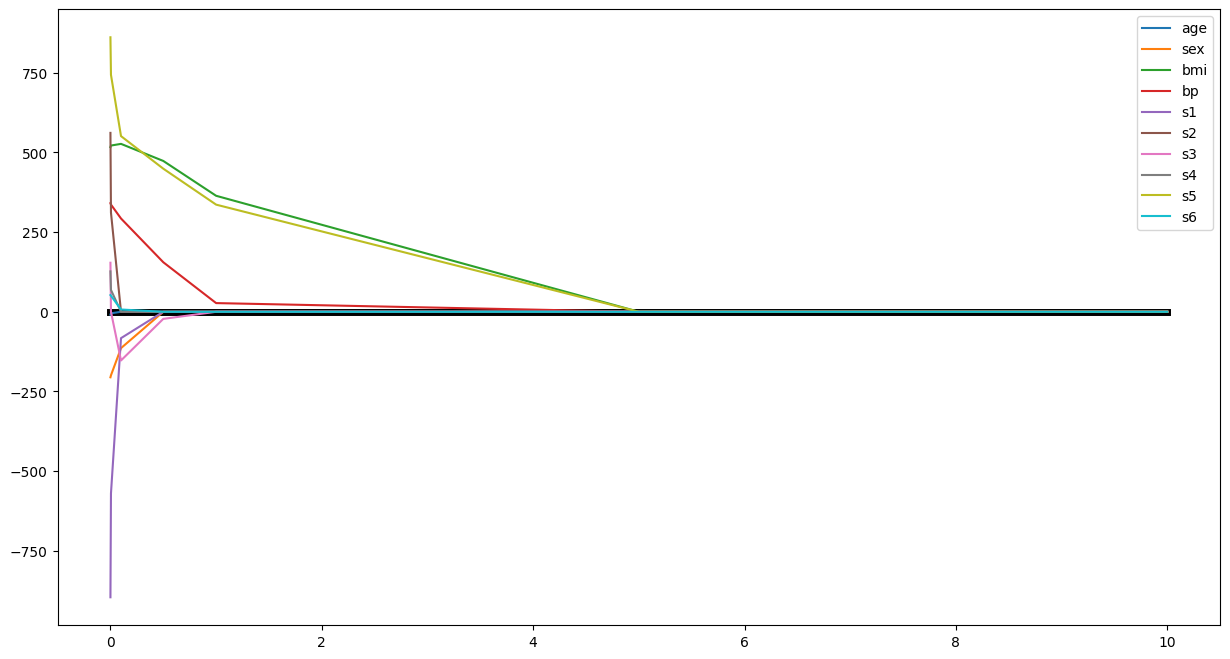

In [51]:
input_array = np.array(coefs).T


plt.figure(figsize=(15,8))

plt.plot(alphas, np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    
    plt.plot(alphas, input_array[i],label=data.feature_names[i])
    
plt.legend()

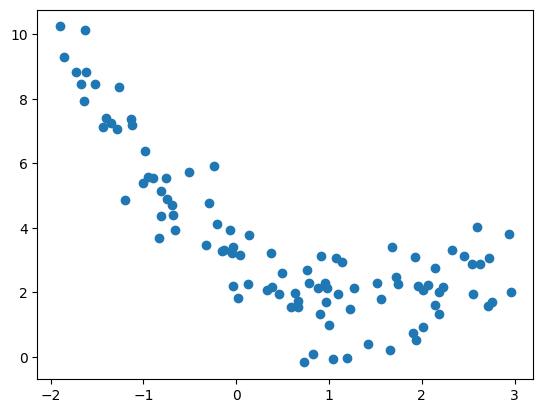

In [52]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 -2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [57]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,10)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.358e+01, tolerance: 4.549e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

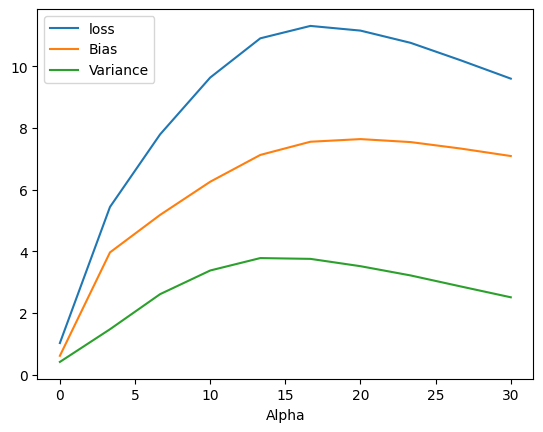

In [58]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


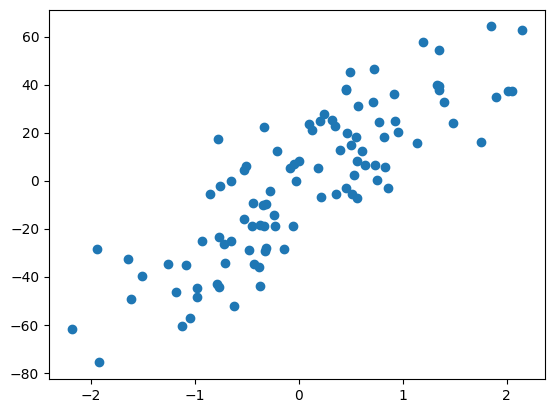

In [59]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X,y)

print(reg.coef_)
print(reg.intercept_)

In [ ]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() - 2.29)**2) + alpha * m

def predict(m):
    return m*X + 2.29

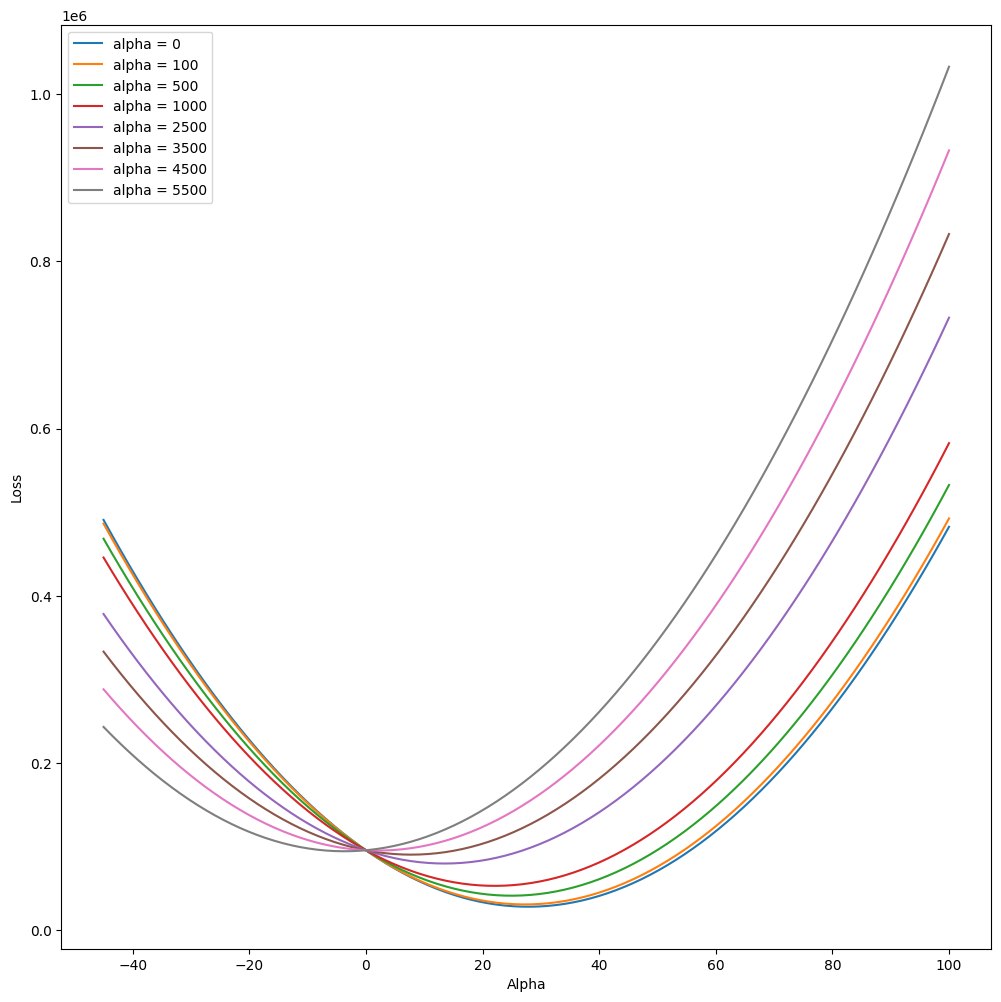

In [61]:
m = np.linspace(-45,100,100)

plt.figure(figsize=(12,12))

for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)

    plt.plot(m, loss, label=f'alpha = {j}')

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()